In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [159]:
from fastbook import *
from utils import *
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.metrics import accuracy_score, roc_auc_score 

path = Path('/Users/baranserajelahi/Codes/fraud-detection-pytorch-scikit-fastai/data')
Path.BASE_PATH = path
pd.options.display.max_rows = 200
pd.options.display.max_columns = 120

In [34]:
path.ls()

(#13) [Path('test_transaction.csv'),Path('train_s.csv'),Path('train_ss.csv'),Path('train_identity.csv'),Path('test.csv'),Path('xs_final.pkl'),Path('to2.pkl'),Path('valid_xs_final.pkl'),Path('train.csv'),Path('to.pkl')...]

In [16]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [17]:
train_ss.head(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
57195,3044195,0,1316341,418.950,W,4806,490.0,150.0,visa,226.0,debit,315.0,87.0,NaN,NaN,aol.com,NaN,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,472.0,NaN,463.0,288.0,288.0,NaN,NaN,NaN,NaN,288.0,NaN,NaN,NaN,NaN,288.0,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312877,3299877,0,7780176,59.000,W,12577,268.0,150.0,visa,166.0,debit,325.0,87.0,4.0,NaN,gmail.com,NaN,5.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,4.0,0.0,NaN,NaN,330.0,196.0,NaN,NaN,NaN,NaN,400.0,301.0,NaN,NaN,NaN,330.0,T,T,T,M0,F,T,F,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195195,3182195,1,4394717,29.000,W,4693,417.0,150.0,visa,195.0,debit,308.0,87.0,1.0,NaN,yahoo.com,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,8.0,1.0,51.0,51.0,0.0,51.0,0.0,NaN,NaN,NaN,NaN,51.0,51.0,NaN,NaN,NaN,51.0,T,T,T,M0,T,F,F,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21600,3008600,0,572518,24.000,W,7919,194.0,150.0,mastercard,202.0,debit,123.0,87.0,0.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,T,M1,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12253,2999253,0,348181,57.950,W,13108,215.0,150.0,visa,226.0,debit,191.0,87.0,27.0,NaN,NaN,NaN,2.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,3.0,0.0,18.0,2.0,484.0,484.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,483.0,NaN,NaN,NaN,NaN,NaN,T,T,T,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377675,3364675,0,9444273,150.000,R,15225,555.0,182.0,visa,226.0,credit,204.0,87.0,NaN,NaN,yahoo.com,anonymous.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-25.0,236986.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,62.0,480.0,New,NotFound,128.0,NaN,410.0,298.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Windows 7,chrome generic,24.0,1366x768,match_status:2,T,F,F,F,desktop,Windows
160611,3147611,0,3374431,250.000,R,16174,399.0,150.0,american express,137.0,credit,299.0,87.0,NaN,1733.0,gmail.com,gmail.com,1.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,2.0,1.0,576.0,354.0,NaN,576.0,353.0,NaN,NaN,87.041664,0.041666,NaN,NaN,NaN,0.0,NaN,576.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,19501.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,-480.0,Found,Found,166.0,NaN,312.0,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,chrome 63.0,24.0,1366x768,match_status:2,T,F,T,F,desktop,Windows
86738,3073738,0,1822406,24.078,C,4094,555.0,150.0,visa,226.0,credit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com,3.0,7.0,0.0,2.0,0.0,2.0,2.0,3.0,0.0,4.0,3.0,3.0,3.0,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
426550

In [18]:
train_ss.shape

(59054, 95)

In [19]:
train_ss.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'id_01', 'id_02', 'id_03', 'id_04',
       'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20',
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [20]:
train_ss.columns[0]

'TransactionID'

In [21]:
dep_var = 'isFraud'

In [22]:
procs = [Categorify, FillMissing]

In [23]:
train_ss['isFraud']

57195     0
312877    0
195195    1
21600     0
12253     0
         ..
224165    0
322952    1
449491    0
343893    0
125898    0
Name: isFraud, Length: 59054, dtype: int64

To create a validation set we will take rows with transaction numbers greater than a certain value. These rows are transactions that occour later in time. This seems like a good idea since the test set consists of transactions that happen in the future with respect to our data set.

In [24]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)
cut_off

12579784

In [25]:
cond = train_ss['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [26]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']


In [27]:
len(cont),len(cat)

(45, 49)

In [28]:
assert len(cat)+len(cont)==(len(train_ss.columns)-1)

In [29]:
to = TabularPandas(train_ss, procs, cat, cont, y_names=dep_var, splits=splits)

In [30]:
TabularPandas?

In [31]:
to.show()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,DeviceInfo,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,dist1_na,dist2_na,D1_na,D2_na,D3_na,D4_na,D5_na,D6_na,D7_na,D8_na,D9_na,D10_na,D11_na,D12_na,D13_na,D14_na,D15_na,id_01_na,id_02_na,id_03_na,id_04_na,id_05_na,id_06_na,id_07_na,id_08_na,id_09_na,id_10_na,id_11_na,TransactionID,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,isFraud
57195,W,4806,490,150,visa,226,debit,315,87,aol.com,#na#,#na#,#na#,#na#,#na#,#na#,T,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,True,True,False,True,False,False,False,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,3044195,1316341,418.950012,8.0,36.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,472.0,97.0,463.0,288.0,288.0,0.0,0.0,39.208332,0.666666,288.0,36.0,0.0,0.0,0.0,288.0,-5.0,123602.0,0.0,0.0,0.0,0.0,14.0,-33.0,0.0,0.0,100.0,0
312877,W,12577,268,150,visa,166,debit,325,87,gmail.com,#na#,T,T,T,M0,F,T,F,T,T,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,True,False,True,True,False,False,True,True,True,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,3299877,7780176,59.000000,4.0,36.0,5.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,4.0,0.0,97.0,8.0,330.0,196.0,0.0,0.0,39.208332,0.666666,400.0,301.0,0.0,0.0,0.0,330.0,-5.0,123602.0,0.0,0.0,0.0,0.0,14.0,-33.0,0.0,0.0,100.0,0
195195,W,4693,417,150,visa,195,debit,308,87,yahoo.com,#na#,T,T,T,M0,T,F,F,T,T,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,3182195,4394717,29.000000,1.0,36.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,8.0,1.0,51.0,51.0,0.0,51.0,0.0,0.0,0.0,39.208332,0.666666,51.0,51.0,0.0,0.0,0.0,51.0,-5.0,123602.0,0.0,0.0,0.0,0.0,14.0,-33.0,0.0,0.0,100.0,1
21600,W,7919,194,150,mastercard,202,debit,123,87,#na#,#na#,T,T,T,M1,T,F,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,3008600,572518,24.000000,0.0,36.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,24.0,9.0,0.0,0.0,39.208332,0.666666,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,123602.0,0.0,0.0,0.0,0.0,14.0,-33.0,0.0,0.0,100.0,0
12253,W,13108,215,150,visa,226,debit,191,87,#na#,#na#,T,T,T,#na#,#na#,F,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,True,False,False,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,2999253,348181,57.950001,27.0,36.0,2.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,3.0,0.0,18.0,2.0,484.0,484.0,7.0,24.0,9.0,0.0,0.0,39.208332,0.666666,483.0,36.0,0.0,0.0,0.0,48.0,-5.0,123602.0,0.0,0.0,0.0,0.0,14.0,-33.0,0.0,0.0,100.0,0
377675,R,15225,555,182,visa,226,credit,204,87,yahoo.com,anonymous.com,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,desktop,Windows,NotFound,62,480,New,NotFound,128,#na#,410,298,#na#,#na#,#na#,#na#,#na#,#na#,#na#,New,NotFound,Windows 7,ch

In [32]:
to.items.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,...,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,dist1_na,dist2_na,D1_na,D2_na,D3_na,D4_na,D5_na,D6_na,D7_na,D8_na,D9_na,D10_na,D11_na,D12_na,D13_na,D14_na,D15_na,id_01_na,id_02_na,id_03_na,id_04_na,id_05_na,id_06_na,id_07_na,id_08_na,id_09_na,id_10_na,id_11_na
57195,3044195,0,1316341,418.950012,5,1233,390,30,4,70,3,68,21,8.0,36.0,3,0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,472.0,97.0,463.0,288.0,288.0,0.0,0.0,39.208332,0.666666,288.0,36.0,0.0,0.0,0.0,288.0,0,0,0,0,0,2,0,0,0,-5.0,123602.0,0.0,0.0,0.0,...,0.0,0.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,1,1,1,2,2,2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
312877,3299877,0,7780176,59.000000,5,3740,168,30,4,40,3,70,21,4.0,36.0,17,0,5.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,4.0,0.0,97.0,8.0,330.0,196.0,0.0,0.0,39.208332,0.666666,400.0,301.0,0.0,0.0,0.0,330.0,2,2,2,1,1,2,1,2,2,-5.0,123602.0,0.0,0.0,0.0,...,0.0,0.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,1,1,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
195195,3182195,1,4394717,29.000000,5,1196,317,30,4,51,3,64,21,1.0,36.0,54,0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,8.0,1.0,51.0,51.0,0.0,51.0,0.0,0.0,0.0,39.208332,0.666666,51.0,51.0,0.0,0.0,0.0,51.0,2,2,2,1,2,1,1,2,2,-5.0,123602.0,0.0,0.0,0.0,...,0.0,0.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,1,1,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
21600,3008600,0,572518,24.000000,5,2236,94,30,3,57,3,6,21,0.0,36.0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,24.0,9.0,0.0,0.0,39.208332,0.666666,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,1,0,0,0,-5.0,123602.0,0.0,0.0,0.0,...,0.0,0.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
12253,2999253,0,348181,57.950001,5,3916,115,30,4,70,3,26,21,27.0,36.0,0,0,2.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,3.0,0.0,18.0,2.0,484.0,484.0,7.0,24.0,9.0,0.0,0.0,39.208332,0.666666,483.0,36.0,0.0,0.0,0.0,48.0,2,2,2,0,0,1,0,0,0,-5.0,123602.0,0.0,0.0,0.0,...,0.0,0.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [33]:
to.classes['card1']

(#5603) ['#na#',1012,1013,1016,1022,1027,1028,1030,1037,1038...]

In [34]:
(path/'to.pkl').save(to)

In [35]:
to = (path/'to.pkl').load()

In [36]:
xs, y             = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [37]:
xs.shape, valid_xs.shape

((48378, 122), (10676, 122))

The number of columns has increased from 95 to 122 because the FillMissing proc has created new columns to indicate where data was missing.

In [38]:
np.array(xs.columns.to_list())

array(['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType',
       'DeviceInfo', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'dist1_na', 'dist2_na', 'D1_na', 'D2_na', 'D3_na', 'D4_na', 'D5_na', 'D6_na', 'D7_na', 'D8_na', 'D9_na', 'D10_na',
       'D11_na', 'D12_na', 'D13_na', 'D14_na', 'D15_na', 'id_01_na', 'id_02_na', 'id_03_na', 'id_04_na', 'id_05_na', 'id_06_na', 'id_07_na', 'id_08_na', 'id_09_na', 'id_10_na', 'id_11_na',
       'TransactionID', 'TransactionDT', 'TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5',
       'D6', 'D7', 'D8', 'D9', 'D10

In [84]:
m = DecisionTreeClassifier(max_leaf_nodes=4)

In [85]:
m.fit(xs, y)

DecisionTreeClassifier(max_leaf_nodes=4)

In [86]:
#draw_tree(m, xs, size=7, leaves_parallel=True, precision=2)

In [87]:
preds = m.predict(valid_xs)

In [88]:
accuracy_score(valid_y, preds)

0.9662795054327463

That is expected, accuracy cant be trusted because of the major imbalance of labels. 

The competition ask for a prediction of the probabily of 'isFraud' = 1.

In [48]:
#m.predict_proba?
#The predicted class probability is the fraction of samples of the same class in a leaf
def m_roc(y, xs):
    preds = m.predict_proba(xs)
    preds_isFraud = preds[:,1]
    return roc_auc_score(y, preds_isFraud)

In [90]:
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.6760864912137933, 0.6577448185833014)

In [91]:
m = DecisionTreeClassifier()

In [92]:
%%time
m.fit(xs, y)

CPU times: user 1.58 s, sys: 30.9 ms, total: 1.61 s
Wall time: 1.62 s


DecisionTreeClassifier()

In [93]:
m_roc(y, xs), m_roc(valid_y, valid_xs)

(1.0, 0.6797634855470067)

I've allowed the tree to fit to the training data closely. The ROC score appears to have been positively impacted.

In [94]:
m.get_n_leaves(), len(xs)

(1708, 48378)

Q: How to find the best value for max leaf nodes?

In [179]:
DecisionTreeClassifier?

### Hyperparameter tuning

(source)[https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680]
1. criterion='entropy' or criterion='gini', entropy seems to work a little better!
2. splitter='best' or splitter='random', use best unless there is an overfitting problem, than consider 'random' 
   (still random splitting doesn't seem to me like the first thing to combat overfitting.
3. max_depth='None', I will instead control the depth of the tree using max_leaf_nodes, min_samples_leaf and min_samples_split.
4. min_samples_split, ideal value for CART algorithim implemented in scikit is in [1,40].
5. min_samples_leaf, ideal value for CART algorithim implemented in scikit is in [1,20].
6. min_weight_fraction_leaf, after setting sample_weights this will help deal with the class imbalance
7. max_features='sqrt', 'log2', 'None', just try them.
8. min_impurity_decrease, leave it at 0.
9. class_weight='balanced'!
10. presort, 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [183]:
parameters = {'min_samples_split': [2, 5, 10, 20, 30, 40], 
              'min_samples_leaf':[1, 5, 10, 20], 
              'max_features':('sqrt', 'log2', 'auto'), 'max_leaf_nodes':[5, 10, 20, 30, 40, 50, 60]}


In [11]:
GridSearchCV?

In [162]:
make_scorer?

In [184]:
clf = GridSearchCV(DecisionTreeClassifier(criterion='entropy', class_weight='balanced'), parameters, 
                   scoring=make_scorer(roc_auc_score, needs_proba=True), n_jobs=-1)

In [185]:
clf.fit(xs, y)
clf.best_estimator_, clf.best_score_, clf.best_params_

(DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=50,
                        min_samples_split=10),
 0.8206611341768142,
 {'max_features': 'sqrt',
  'max_leaf_nodes': 50,
  'min_samples_leaf': 1,
  'min_samples_split': 10})

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_leaf_nodes': [5, 10, 20, 30, 40, 50, 60]},
             scoring=make_scorer(roc_auc_score, needs_proba=True))

(DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=40),
 0.8333981739189469,
 {'criterion': 'entropy', 'max_leaf_nodes': 40})

In [42]:
clf.best_estimator_, clf.best_score_, clf.best_params_

(DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        max_leaf_nodes=30, min_samples_leaf=5,
                        min_samples_split=20),
 0.6125098476653137,
 {'criterion': 'entropy',
  'max_features': 'auto',
  'max_leaf_nodes': 30,
  'min_samples_leaf': 5,
  'min_samples_split': 20})

In [155]:
clf.best_estimator_, clf.best_score_, clf.best_params_

(DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        min_samples_leaf=10, min_samples_split=80,
                        min_weight_fraction_leaf=0),
 0.9677332978690449,
 {'criterion': 'entropy',
  'max_features': 'auto',
  'min_samples_leaf': 10,
  'min_samples_split': 80,
  'min_weight_fraction_leaf': 0})

In [104]:
#using accuracy as the metric
m = DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        min_samples_leaf=10, min_samples_split=80,
                        )
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.9508720939515138, 0.7511309243809268)

In [140]:
m = DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        max_leaf_nodes=30, min_samples_leaf=5,
                        min_samples_split=20)
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.80714396923606, 0.784308445918241)

# play with max_leaf_nodes

In [51]:
DecisionTreeClassifier?


In [170]:
m = DecisionTreeClassifier(criterion='entropy', max_features='auto', 
                        )
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(1.0, 0.6023784738778172)

In [129]:
m = DecisionTreeClassifier(max_leaf_nodes=50, criterion='entropy')
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8618505717824783, 0.8074711929819782)

In [193]:
m = DecisionTreeClassifier(max_leaf_nodes=50, criterion='entropy', class_weight='balanced')
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8746486806683326, 0.807590195476623)

In [206]:
m = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=50,
                        min_samples_split=10)
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8425304034462642, 0.7683094887594063)

In [117]:
m = DecisionTreeClassifier(max_leaf_nodes=50, criterion='entropy', max_features='sqrt')
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.833239742522984, 0.7954783860216543)

In [146]:
m = DecisionTreeClassifier(criterion='entropy')
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(1.0, 0.650076970973809)

In [174]:
m = DecisionTreeClassifier(max_leaf_nodes=60, criterion='entropy', max_features='sqrt',class_weight='balanced')
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8557692293735982, 0.7830242607487568)

# play with min_samples_leaf

In [109]:
m = DecisionTreeClassifier(min_samples_leaf=80,  criterion='entropy')
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.9388819874754668, 0.7712447500667136)

# Random forests

In [128]:
max_samples = math.ceil(len(to.train)*0.66)
def rf(xs, y, max_samples=max_samples, **kwargs):
    return RandomForestClassifier(n_jobs=-1, 
        max_samples=max_samples, oob_score=True, **kwargs).fit(xs, y)

In [131]:
m = rf(xs, y, n_estimators=1000, max_leaf_nodes=50, criterion='entropy')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8830701783754645, 0.8323229473939522)

In [175]:
m = rf(xs, y, n_estimators=1000, max_leaf_nodes=50, criterion='entropy', class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8958857894242327, 0.836145184646194)

In [132]:
m = rf(xs, y, n_estimators=1000, max_leaf_nodes=50, criterion='entropy')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8839517576042122, 0.8319999978630304)

In [176]:
m = rf(xs, y, n_estimators=200, max_leaf_nodes=50, criterion='entropy',class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8962130085073817, 0.8362135676734198)

In [143]:
m = rf(xs, y, n_estimators=200, criterion='entropy', max_features='auto',
                        max_leaf_nodes=30, min_samples_leaf=5,
                        min_samples_split=20)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8641538177164367, 0.8251978900630645)

In [61]:
%%time
m = rf(xs, y, n_estimators=1000)

CPU times: user 1min, sys: 2.05 s, total: 1min 2s
Wall time: 16.6 s


In [62]:
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.854568081454268, 0.8192102348022061)

In [63]:
roc_auc_score?

In [138]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])

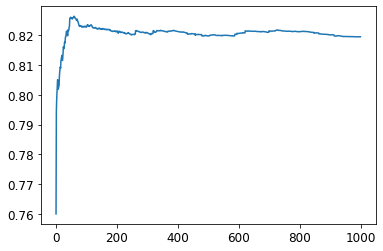

In [139]:
plt.plot([roc_auc_score(valid_y, preds[:i+1,:,1:2].mean(0)) for i in range(1000)])

should be able to get away with using between 50 and 400 estimators

In [209]:
m = rf(xs, y, n_estimators=1000,  criterion='entropy', class_weight='balanced',
      max_features='sqrt', max_leaf_nodes=50,
                        min_samples_split=10)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8963629924881249, 0.8353836221047067)

In [177]:
m = rf(xs, y, n_estimators=1000,  criterion='entropy', class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.9999999999999999, 0.8595703782890299)

In [48]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])

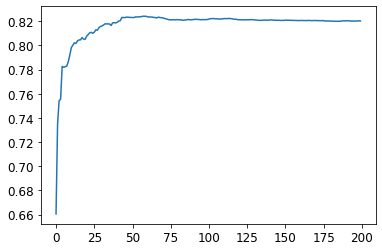

In [49]:
plt.plot([roc_auc_score(valid_y, preds[:i+1,:,1:2].mean(0)) for i in range(200)])

AROC is higher for the training set than for the validation set. This may be the result of overfitting or it may have to do with the fact that the validation set we are predicting on is in the future with relative to the training set. If there is a bit of overfitting, that isn't nessesarily a problem, but nevertheless it would be nice if there were a way to find out. OOB error gives us a way to do that.

# OOB error

In [210]:
  m.oob_decision_function_.shape

(48378, 2)

In [211]:
oob_preds = m.oob_decision_function_[:,1:2]

In [212]:
roc_auc_score(y, oob_preds)

0.8683163509536126

This indicates that there is not much overfitting and that the validation score is lower than the training score because of something that sets the two datasets apart, like for instance the validation set being from the future.

# Class weighting

In [53]:
RandomForestClassifier?

In [54]:
m = rf(xs, y, n_estimators=200, class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8951000910838199, 0.8366949200760013)

In [55]:
oob_preds = m.oob_decision_function_[:,1:2]
roc_auc_score(y, oob_preds)

0.8665416896924331

In [56]:
y, oob_preds

(57195     0
 312877    0
 195195    1
 21600     0
 12253     0
          ..
 224165    0
 322952    1
 449491    0
 343893    0
 125898    0
 Name: isFraud, Length: 48378, dtype: int8,
 array([[0.15857943],
        [0.2218452 ],
        [0.5032215 ],
        ...,
        [0.25132503],
        [0.32700206],
        [0.39310937]]))

# Model interpretation

Qs:

1. How confident are we in our predictions using a particular row
2. What are the most important factors when predicting a particular row and how did the influence it
3. Overall which columns are strongest predictors, which can we trow away?
4. Which columns are redundant, so both are not needed?
5. How do predictions vary as we vary these colummns

## Tree variance for prediction confidence

In [57]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])

In [58]:
roc_auc_score(valid_y,preds[:,:,1:2].mean(0))

0.8366949200760013

In [59]:
roc_auc_score?

In [60]:
y_true = np.array([0,1,0,1])
y_pred = np.array([1,0,1,0])
roc_auc_score(y_true,y_pred)

0.0

In [61]:
preds[:,:,1:2].std(0).transpose()

array([[0.21330937, 0.17608038, 0.16974964, ..., 0.1579777 , 0.2587924 , 0.17842799]])

For items where std is large, trees dont agree, unsure, maybe put these items through a different classifier and try again for more confidant predictions.

## Feature importance

In [62]:
def rf_feature_importance(m, df):
    return pd.DataFrame({'cols': df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [153]:
fi = rf_feature_importance(m, xs)
fi[:10]

,cols,imp
86,C5,0.046539
98,D3,0.046041
95,C14,0.040546
94,C13,0.037304
85,C4,0.036845
97,D2,0.036460
82,C1,0.033197
89,C8,0.030601
83,C2,0.029876
10,R_emaildomain,0.028845


<AxesSubplot:ylabel='cols'>

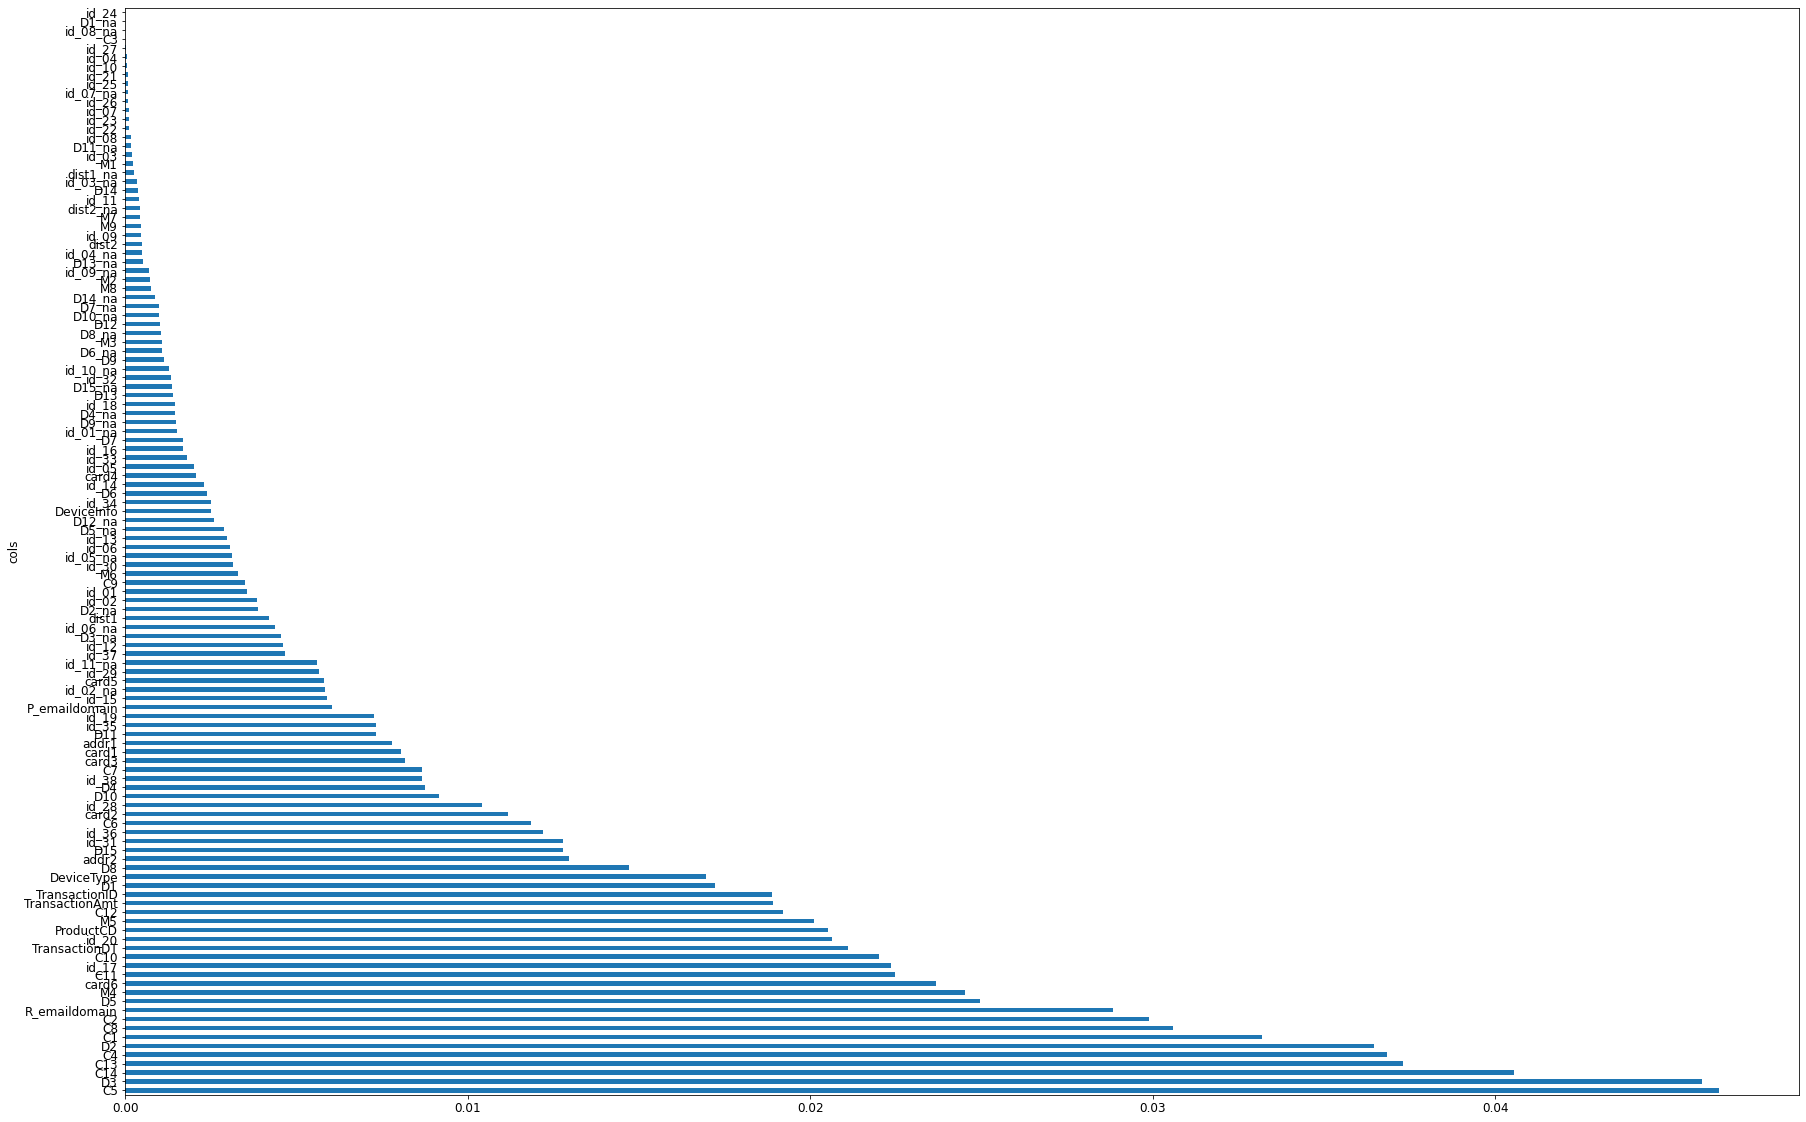

In [154]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(30,20), legend=False)
                   
plot_fi(fi)

## Removing low-importance features

In [155]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

49

In [156]:
xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [157]:
#slight improvement
m = rf(xs_imp, y, n_estimators=200, class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

(0.8977163922911331, 0.8368498503720597)

In [158]:
#0.003 lower
to_keep = fi[fi.imp>0.01].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200, class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 33


(0.8929122481466576, 0.8351024770416006)

<AxesSubplot:ylabel='cols'>

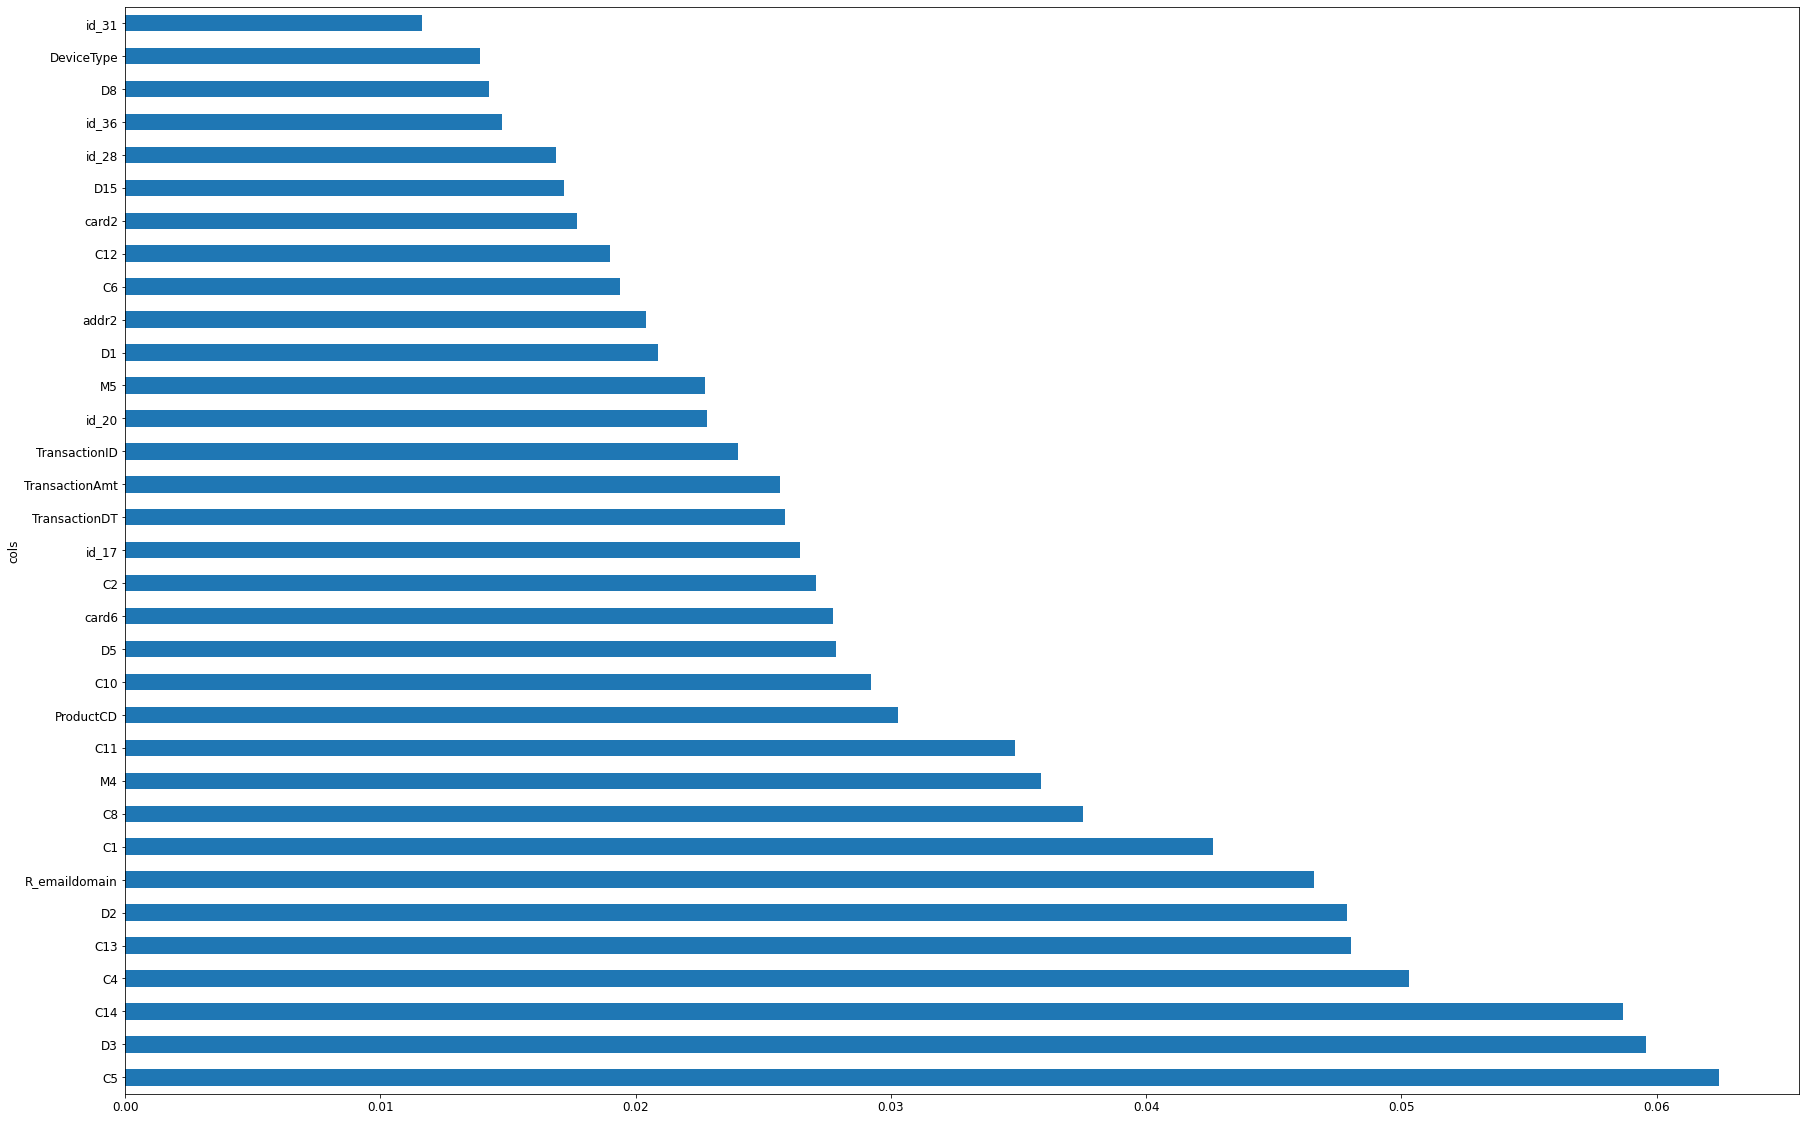

In [159]:
plot_fi(rf_feature_importance(m, xs_imp))

In [898]:
to_keep = fi[fi.imp>0.02].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200, class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 16


(0.8819502032379702, 0.8277725377502358)

<AxesSubplot:ylabel='cols'>

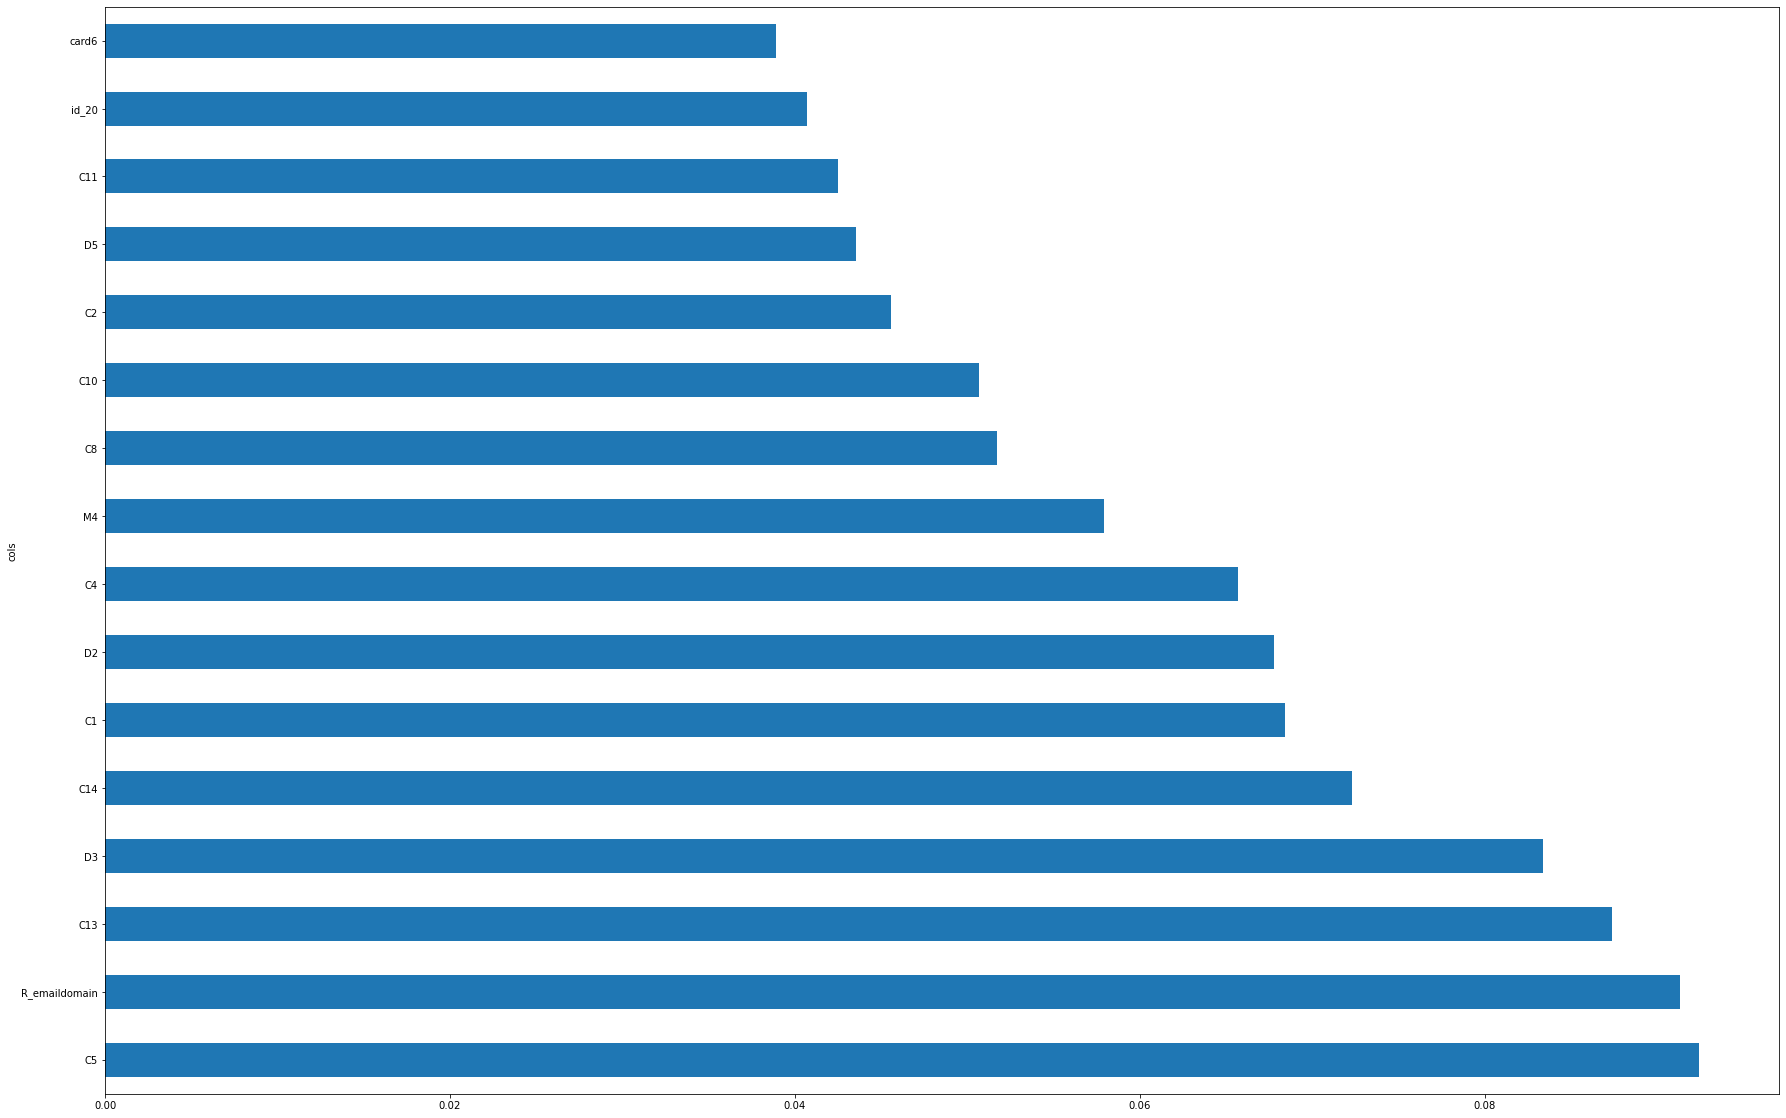

In [899]:
plot_fi(rf_feature_importance(m, xs_imp))

In [900]:
to_keep = fi[fi.imp>0.03].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200, class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 9


(0.8658933053150355, 0.8141305245004901)

<AxesSubplot:ylabel='cols'>

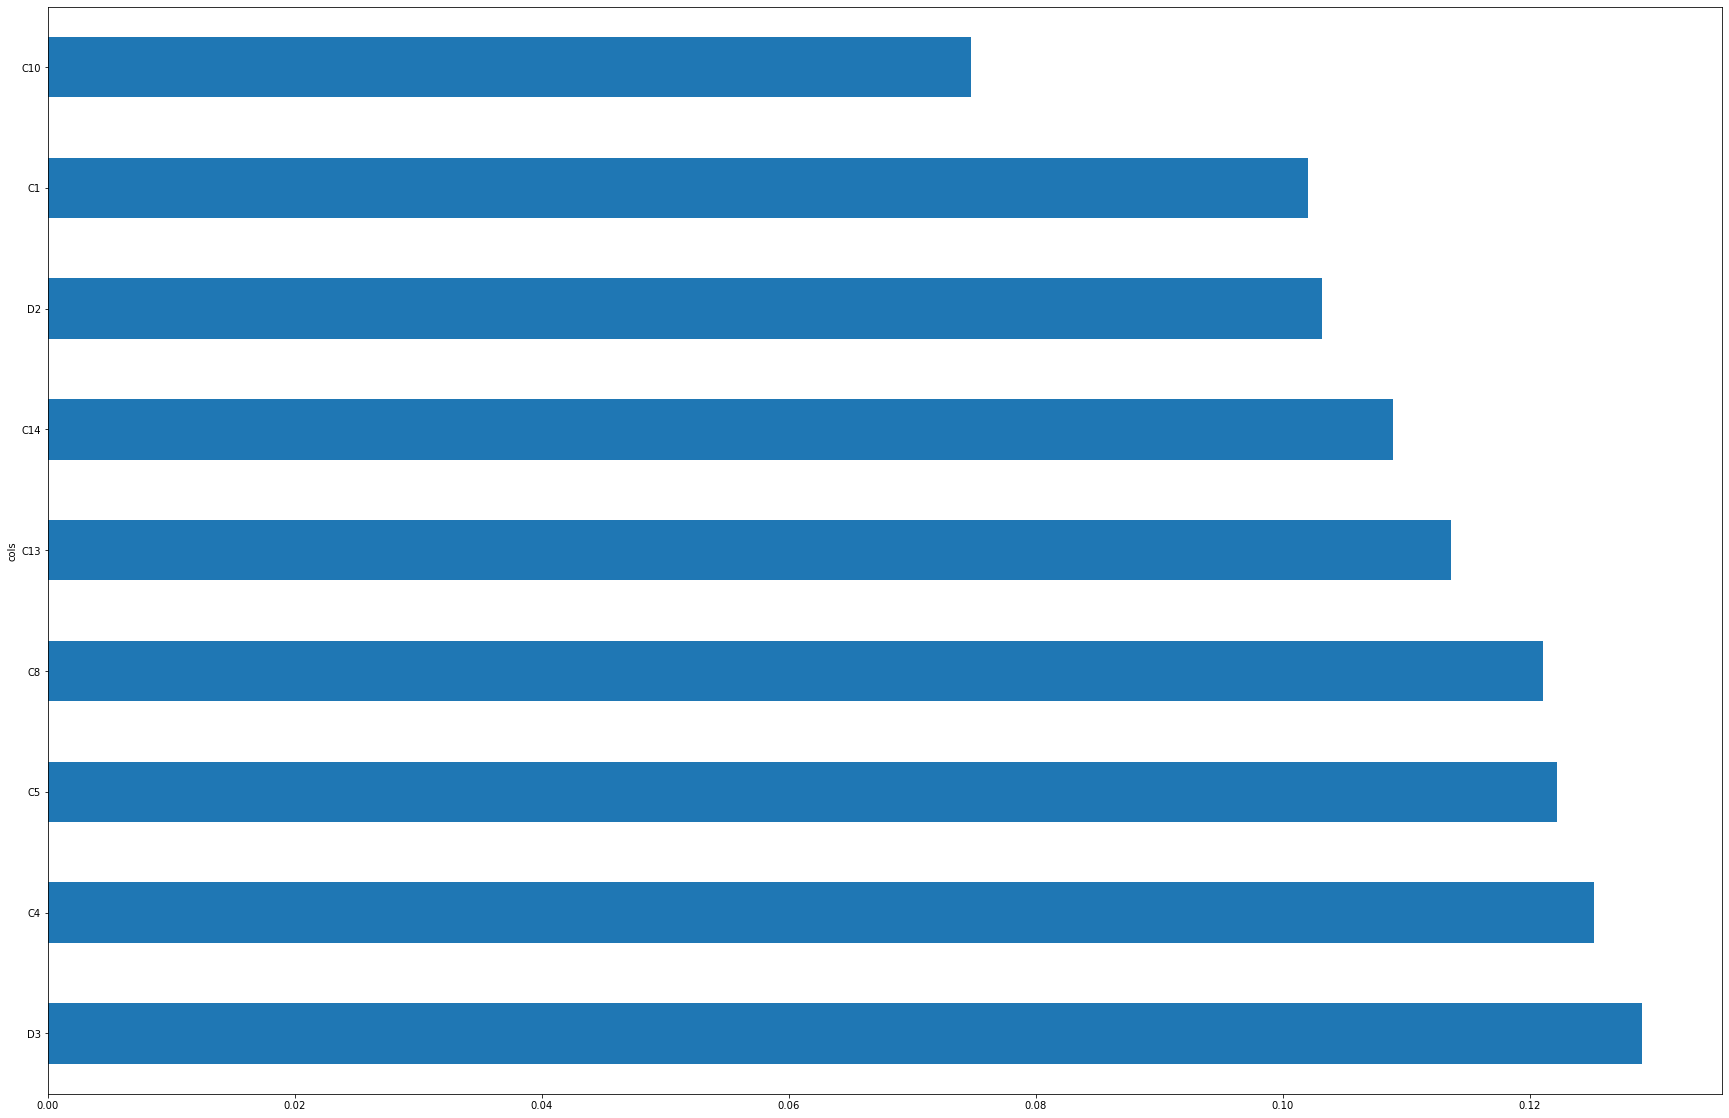

In [901]:
plot_fi(rf_feature_importance(m, xs_imp))

In [902]:
to_keep = fi[fi.imp>0.04].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200, class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 4


(0.81327060317848, 0.7409586819598896)

<AxesSubplot:ylabel='cols'>

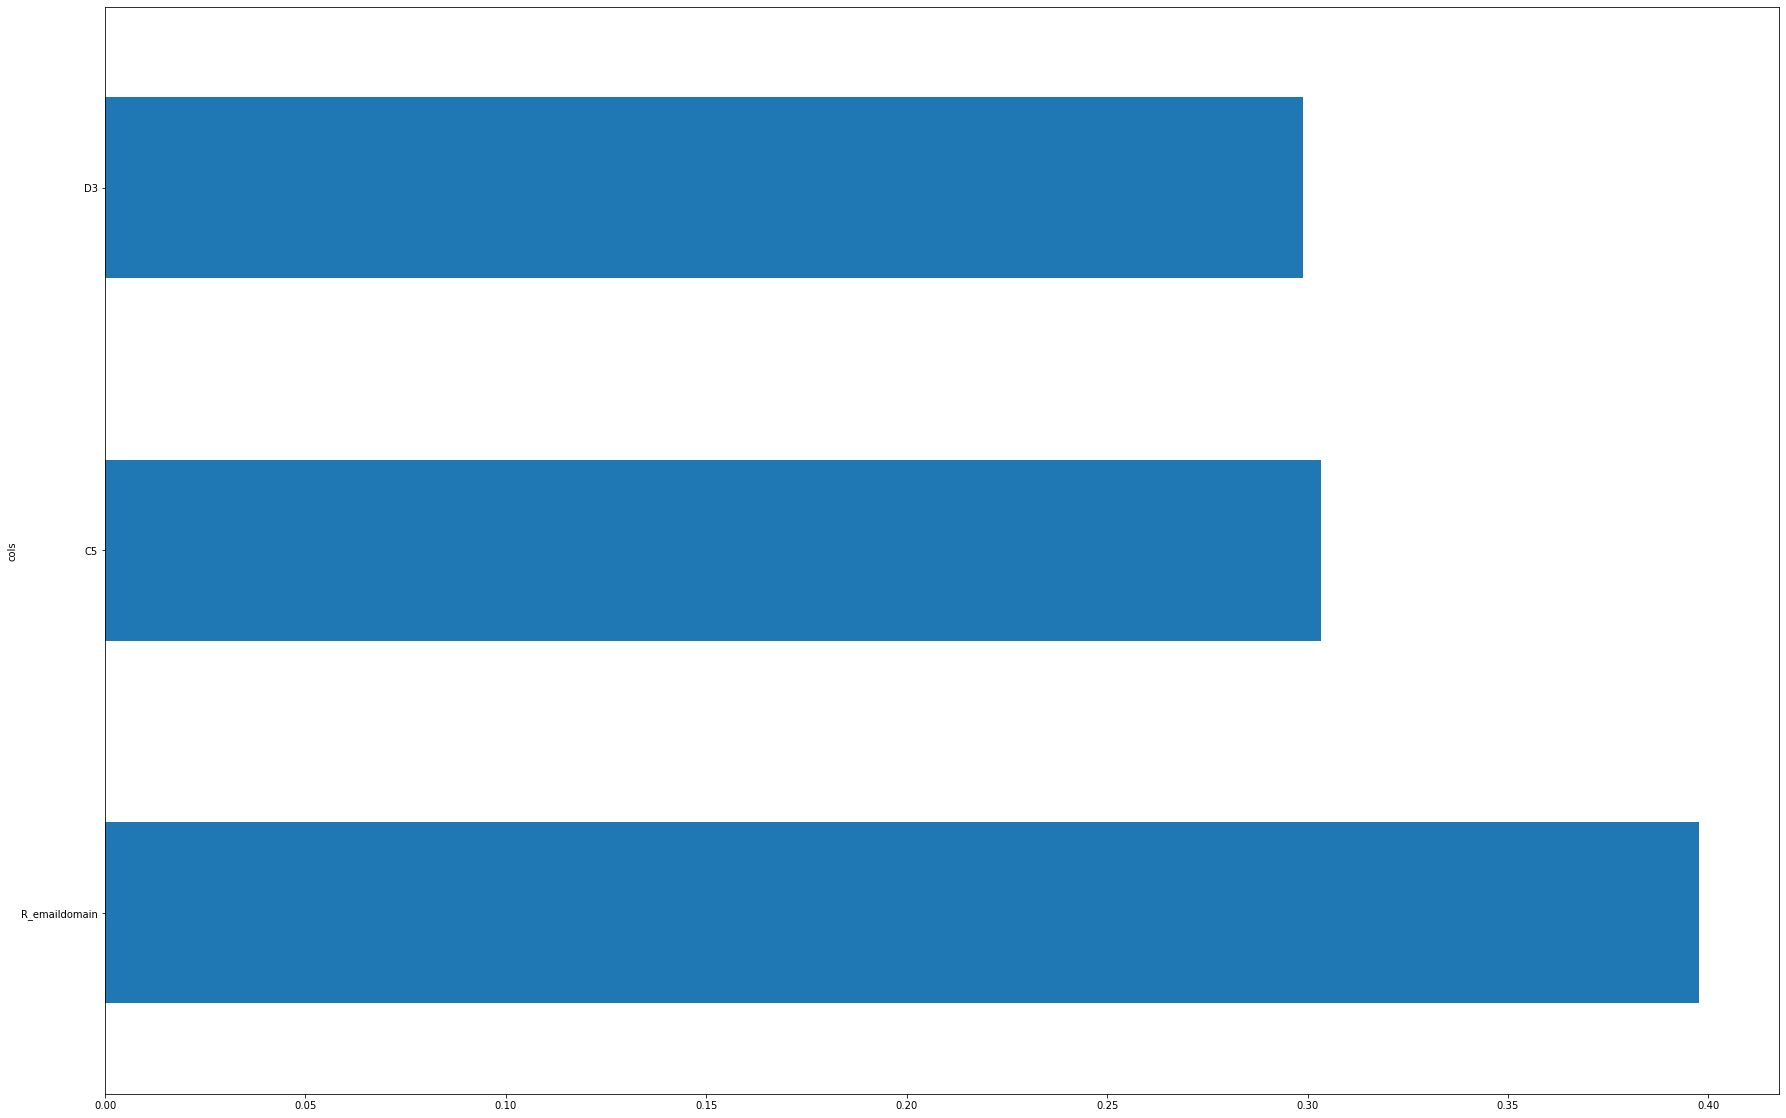

In [833]:
plot_fi(rf_feature_importance(m, xs_imp))

##  Remove redundant features

In [160]:
xs_imp.shape, valid_xs_imp.shape

((48378, 33), (10676, 33))

In [1060]:
#from scipy.cluster import hierarchy as hc

In [1061]:
#def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()

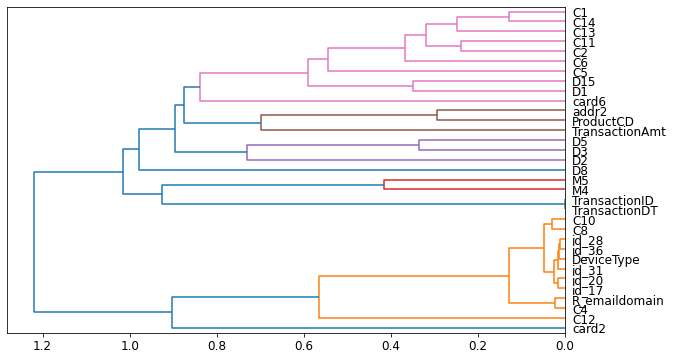

In [161]:
cluster_columns(xs_imp)

This suggests that one of TransactionID or TransactionDT is redundant.
Other possible redundant groups: (id_17, id_20), (id_28, id_36, 'DeviceType').

In [164]:
def get_oob(df):
    m = RandomForestClassifier(n_estimators=40, class_weight='balanced', max_leaf_nodes=50,
        max_features='sqrt', n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return roc_auc_score(y,  m.oob_decision_function_[:,1:2])

In [165]:
get_oob(xs_imp)

0.8638834050659946

In [167]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'TransactionID', 'TransactionDT', 'id_17', 'id_20', 'id_36', 'id_28', 'DeviceType')}

{'TransactionID': 0.8635046350372061,
 'TransactionDT': 0.8622365809574339,
 'id_17': 0.8640154756374246,
 'id_20': 0.8653938888978663,
 'id_36': 0.8630165823256749,
 'id_28': 0.8620913988831709,
 'DeviceType': 0.8627997829006069}

In [169]:
to_drop = ['TransactionID', 'id_17', 'id_28', 'id_36']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8632019334967157

In [174]:
xs_imp.shape, valid_xs_imp.shape

((48378, 33), (10676, 33))

In [171]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [172]:
(path/'xs_final.pkl').save(xs_final)
(path/'valid_xs_final.pkl').save(valid_xs_final)

In [65]:
xs_final = (path/'xs_final.pkl').load()
valid_xs_final = (path/'valid_xs_final.pkl').load()

In [66]:
m = rf(xs_final, y, n_estimators=200, class_weight='balanced')
m_roc(y, xs_final), m_roc(valid_y, valid_xs_final)

(0.89370253672261, 0.8355284017951613)

## Partial dependance

In [176]:
valid_xs_final.columns

Index(['C5', 'D3', 'C14', 'C13', 'C4', 'D2', 'C1', 'C8', 'C2', 'R_emaildomain',
       'D5', 'M4', 'card6', 'C11', 'C10', 'TransactionDT', 'id_20',
       'ProductCD', 'M5', 'C12', 'TransactionAmt', 'D1', 'DeviceType', 'D8',
       'addr2', 'D15', 'id_31', 'C6', 'card2'],
      dtype='object')

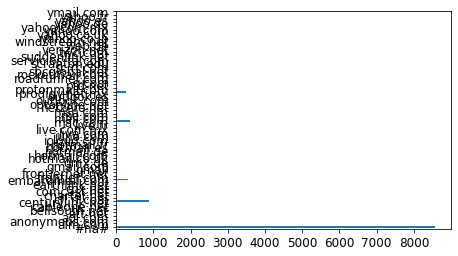

In [177]:
p = valid_xs_final['R_emaildomain'].value_counts(sort=False).plot.barh()
c = to.classes['R_emaildomain']
plt.yticks(range(len(c)), c);

In [1153]:
# I want to look at the Fraud column for all values in the training set where R_emaildomain is missing
n = 1000
pd.options.display.max_rows = n
train_ss[['isFraud','R_emaildomain']].head(n)

,isFraud,R_emaildomain
57195,0,NaN
312877,0,NaN
195195,1,NaN
21600,0,NaN
12253,0,NaN
377675,0,anonymous.com
160611,0,gmail.com
86738,0,hotmail.com
426550,0,NaN
34293,0,NaN


In [1154]:
pd.options.display.max_rows = 20


#na# stands out amoung the categories of "R_emaildomain". 

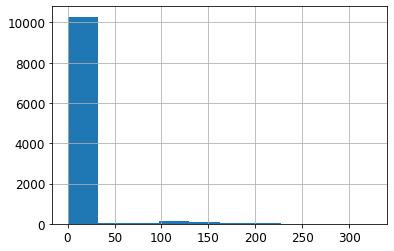

In [178]:
ax = valid_xs_final['C5'].hist()

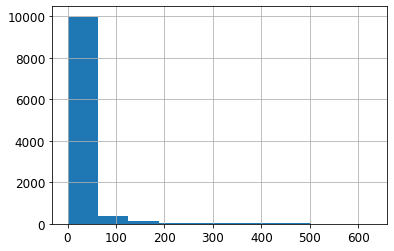

In [179]:
ax = valid_xs_final['D3'].hist()

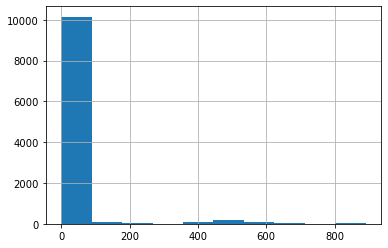

In [44]:
ax = valid_xs_final['C13'].hist()

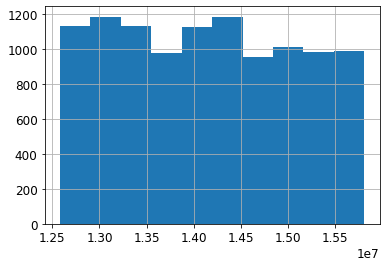

In [1156]:
ax = valid_xs_final['TransactionDT'].hist()

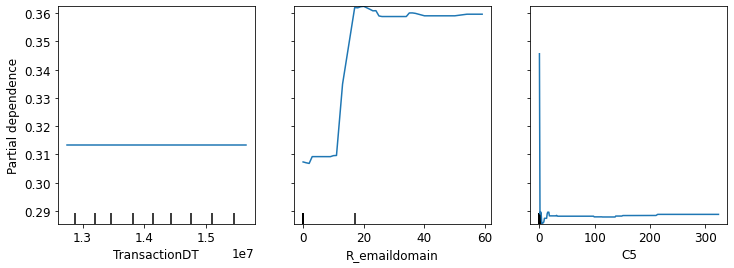

In [1206]:
from sklearn.inspection import plot_partial_dependence

_, ax = plt.subplots(figsize=(12,4))
plot_partial_dependence(m, valid_xs_final, ['TransactionDT','R_emaildomain', 'C5'],
                        grid_resolution=200, ax=ax)

In [1190]:
valid_xs_final['R_emaildomain'].unique()

array([ 0,  2, 55, 17, 20, 36, 54, 35,  5, 42, 31, 10, 24, 43, 22,  3, 32, 57, 25, 11, 27, 50, 18, 40, 58, 34,  4, 26, 46, 59, 56, 19, 49, 29, 37,  9, 41, 13, 23,  1, 33], dtype=int8)

## Tree Interperator

In [1223]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [1224]:
from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [1238]:
row = valid_xs_final[:5]

In [1239]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [1284]:
prediction[0,1],bias[0,1] + contributions[0].sum(axis=0)[1]

(0.2945889951767163, 0.29458899517671605)

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/fastaiV2/lib/python3.8/site-packages/matplotlib/pyplot.py'>

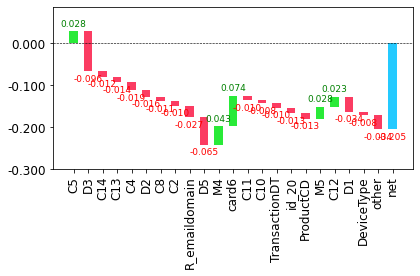

In [1303]:
waterfall(valid_xs_final.columns, contributions[0][:,1], threshold=0.08, 
          rotation_value=90, formatting='{:,.3f}')

## Finding Out-of-Domain Data

In [1313]:
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

m = rf(df_dom, is_valid)
rf_feature_importance(m, df_dom)[:6]

,cols,imp
15,TransactionDT,0.926421
25,D15,0.024386
26,id_31,0.012416
19,C12,0.005358
21,D1,0.005188
5,D2,0.005073


In [1320]:
m = rf(xs_final, y, n_estimators=200, class_weight='balanced')
print('orig', m_roc(valid_y, valid_xs_final))

for c in ('TransactionDT','D15','id_31','C12'):
    m = rf(xs_final.drop(c,axis=1), y)
    print(c, m_roc(valid_y, valid_xs_final.drop(c,axis=1)))

orig 0.8353915021801097
TransactionDT 0.8265708930315826
D15 0.8192917067682368
id_31 0.8200035847665053
C12 0.8235271805170343


Can try droping columns that are older to see if keeping just more recent data makes a difference

<AxesSubplot:>

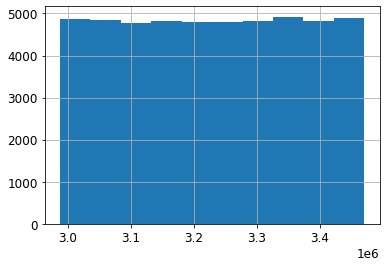

In [1324]:
xs['TransactionID'].hist()

In [67]:
filt = xs['TransactionID']>3.2e6
xs_filt = xs_final[filt]
y_filt = y[filt]

In [68]:
m = rf(xs_final, y, n_estimators=200, class_weight='balanced')
m_roc(y_filt, xs_filt), m_roc(valid_y, valid_xs_final)

(0.8964946120967627, 0.8356727808038158)

In [69]:
xs[cat].nunique()

ProductCD           5
card1            5602
card2             500
card3              63
card4               5
card5              78
card6               5
addr1             144
addr2              25
P_emaildomain      60
R_emaildomain      59
M1                  3
M2                  3
M3                  3
M4                  4
M5                  3
M6                  3
M7                  3
M8                  3
M9                  3
DeviceType          3
DeviceInfo        689
id_12               3
id_13              37
id_14              21
id_15               4
id_16               3
id_17              54
id_18              14
id_19             335
id_20             196
id_21             114
id_22              13
id_23               4
id_24               6
id_25             108
id_26              42
id_27               2
id_28               3
id_29               3
id_30              72
id_31              91
id_32               5
id_33              97
id_34               4
id_35     